# Basic experiment

# Make toy data

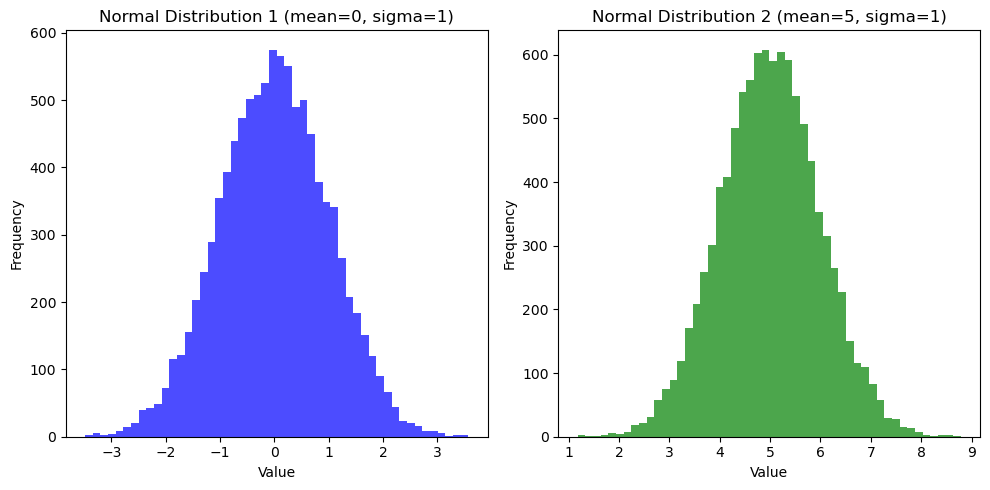

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the first distribution with mean 0 and sigma 1
x1 = np.random.normal(loc=0, scale=1, size=10000)

# Generating the second distribution with mean 5 and sigma 1
x2 = np.random.normal(loc=5, scale=1, size=10000)

# Plotting the distributions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(x1, bins=50, alpha=0.7, color='blue')
plt.title('Normal Distribution 1 (mean=0, sigma=1)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(x2, bins=50, alpha=0.7, color='green')
plt.title('Normal Distribution 2 (mean=5, sigma=1)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
# Save the figure
plt.savefig('normal_distributions.png')
plt.show()

# Define Bayes Erorr NN

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [3]:
class Bayes(nn.Module):
    def __init__(self, input_size=1, hidden_size=100):
        super().__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size,50)
        self.fc3 = nn.Linear(50, 1)
        nn.init.normal_(self.fc1.weight,std=0.02)
        nn.init.constant_(self.fc1.bias, 0)
        nn.init.normal_(self.fc2.weight,std=0.02)
        nn.init.constant_(self.fc2.bias, 0)
        nn.init.normal_(self.fc3.weight,std=0.02)
        nn.init.constant_(self.fc3.bias, 0)
        
    def forward(self, input):
        output = F.elu(self.fc1(input.view(100,1)))
        output = F.elu(self.fc2(output))
        output = self.fc3(output)
        output=torch.sigmoid(output)
        return -output/2

In [9]:
import torch
from torch import autograd, optim

# Assuming Bayes is a defined model

def bayes_error(batch1, batch2, bayes_net):
    be = (1/2 - (torch.mean(bayes_net(batch1)) - torch.mean(bayes_net(batch2))))
    return be

def learn_bayes(batch1, batch2, bayes_net, bayes_net_optim):
    # Ensure inputs require gradients
    batch1 = torch.FloatTensor(batch1).requires_grad_(True)
    batch2 = torch.FloatTensor(batch2).requires_grad_(True)
    
    # Calculate Bayes error
    be = bayes_error(batch1, batch2, bayes_net)

    # Calculate loss
    loss = be

    # Backpropagation
    bayes_net_optim.zero_grad()
    loss.backward()
    bayes_net_optim.step()

    return be


In [10]:
def sample_batch(data1, data2, batch_size=100):
    # Sample from each distribution
    batch1 = data1[np.random.choice(data1.shape[0], size=batch_size, replace=False)]
    batch2 = data2[np.random.choice(data2.shape[0], size=batch_size, replace=False)]

    return batch1, batch2

In [11]:
def train(data1,data2, bayes_net,bayes_net_optim, batch_size=100, iter_num=1000, log_freq=int(1e+3)):
    # data is x or y
    result = list()
    for i in range(iter_num):
        batch1, batch2 = sample_batch(data1,data2,batch_size=batch_size)
        be= learn_bayes(batch1, batch2, bayes_net, bayes_net_optim)
        result.append(be.detach().cpu().numpy())
        if (i+1)%(log_freq)==0:
            print(result[-1])
    return result

In [12]:
def ma(a, window_size=100):
    return [np.mean(a[i:i+window_size]) for i in range(0,len(a)-window_size)]

In [13]:
bayes_net_cor = Bayes()
bayes_net_optim_cor = optim.Adam(bayes_net_cor.parameters(), lr=1e-3)
result_cor = train(x1,x2,bayes_net_cor,bayes_net_optim_cor)

0.00020337105


range(0, 1000)
0.00020337105


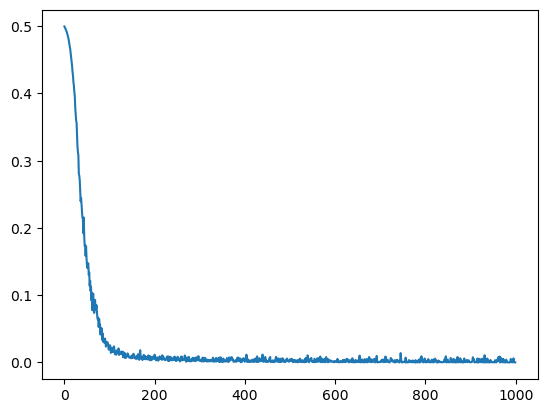

In [14]:
#result_cor_ma = ma(result_cor)
print(range(len(result_cor)))
plt.plot(range(len(result_cor)),result_cor)
print(result_cor[-1])

# Test with various means

[-6.         -5.33333333 -4.66666667 -4.         -3.33333333 -2.66666667
 -2.         -1.33333333 -0.66666667  0.          0.66666667  1.33333333
  2.          2.66666667  3.33333333  4.          4.66666667  5.33333333
  6.        ]


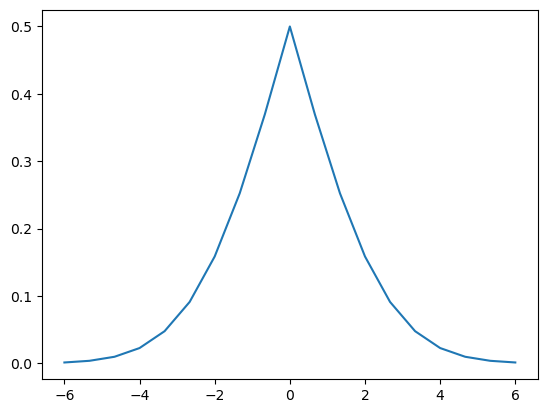

In [15]:
import numpy as np
import matplotlib.pyplot as plt
means = np.linspace(-6,6,19)
print(means)
from scipy.stats import norm
a=norm.sf(abs(means)/2)
plt.plot(means,a)


final_result = []
for rho in correlations:
    rho_data = np.random.multivariate_normal( mean=[0,rho],
                                  cov=[[1,0],[0,1]],
                                 size = 10000)
    mine_net = Mine()
    mine_net_optim = optim.Adam(mine_net.parameters(), lr=1e-3)
    result = train(rho_data,mine_net,mine_net_optim)
    result_ma = ma(result)
    final_result.append(result_ma[-1])
    print(str(rho) + ' : ' + str(final_result[-1]))
    plt.plot(range(len(result_ma)),result_ma)

0.00025448203
-6.0 : 0.0019465053
0.0013726652
-5.333333333333333 : 0.004766597
0.010959864
-4.666666666666667 : 0.011530581
0.012173295
-4.0 : 0.02291803
0.061062038
-3.3333333333333335 : 0.048114628
0.106117636
-2.666666666666667 : 0.09749069
0.19323167
-2.0 : 0.16238089
0.24171996
-1.333333333333334 : 0.25041473
0.36035377
-0.666666666666667 : 0.36764115
0.50000083
0.0 : 0.50000364
0.33046067
0.6666666666666661 : 0.36776417
0.2606089
1.333333333333333 : 0.2539211
0.12206343
2.0 : 0.15506348
0.07851213
2.666666666666666 : 0.09002444
0.065485924
3.333333333333332 : 0.04942306
0.032467812
4.0 : 0.024327643
0.00613001
4.666666666666666 : 0.011829171
0.0039668977
5.333333333333332 : 0.004460846
0.00123173
6.0 : 0.0016869947


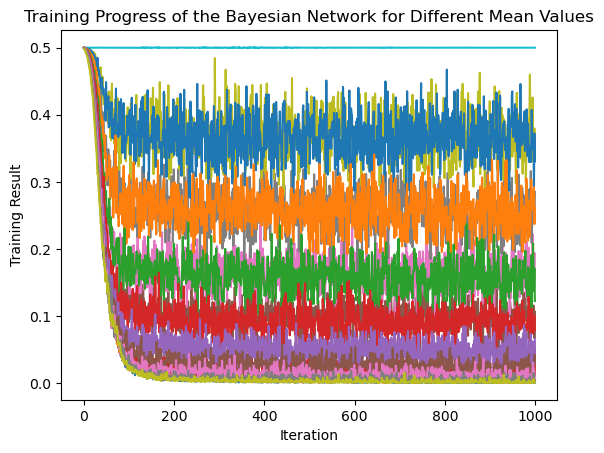

In [21]:
import matplotlib.pyplot as plt

final_result = []
for mean in means:
    # Generating the first distribution with mean 0 and sigma 1
    x1 = np.random.normal(loc=0, scale=1, size=10000)

    # Generating the second distribution with mean and sigma 1
    x2 = np.random.normal(loc=mean, scale=1, size=10000)
    
    # Initializing the Bayes model and the optimizer
    bayes_net = Bayes()
    bayes_net_optim = optim.Adam(bayes_net.parameters(), lr=1e-3)
    
    # Training the model with the generated data
    result = train(x1, x2, bayes_net, bayes_net_optim)
    
    # Calculating the moving average of the result
    result_ma = ma(result)
    
    # Appending the last value of the moving average to final_result
    final_result.append(result_ma[-1])
    
    # Printing the current mean and the corresponding final result
    print(str(mean) + ' : ' + str(final_result[-1]))
    
    # Plotting the result over the iterations
    plt.plot(range(len(result)), result)

# Adding the title (caption) to the plot
plt.title("Training Progress of the Bayesian Network for Different Mean Values")

# Adding axis labels
plt.xlabel("Iteration")
plt.ylabel("Training Result")

# Saving the plot to a file
plt.savefig("training_progress.png")

# Displaying the plot
plt.show()

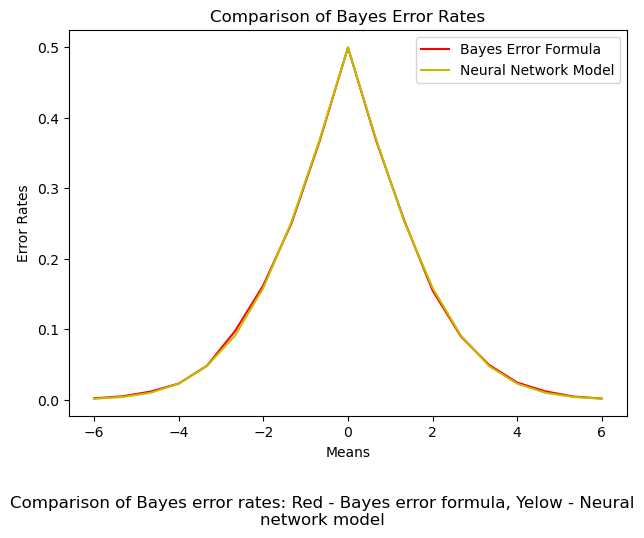

In [24]:
import matplotlib.pyplot as plt

# Assuming means, final_result, and a are already defined
# Plotting the final_result with respect to means in red
plt.plot(means, final_result, 'r', label='Bayes Error Formula')

# Plotting 'a' with respect to means in blue
plt.plot(means, a, 'y', label='Neural Network Model')

# Adding the title (caption) to the plot
plt.title("Comparison of Bayes Error Rates")

# Adding x and y axis labels
plt.xlabel("Means")
plt.ylabel("Error Rates")

# Adding a legend to differentiate between the two plots
plt.legend()

# Adding a concise descriptive caption
caption = ("Comparison of Bayes error rates: "
           "Red - Bayes error formula, Yelow - Neural network model")
plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=12)

# Adjusting the layout to make space for the caption
plt.tight_layout()

# Saving the plot to a file
plt.savefig("comparison_plot.png", bbox_inches='tight')

# Displaying the plot
plt.show()